To give an intuition for the exponential decay of sensitivities, we visualize it using a simple example, a quadratic program with additiive disturbances in the model:

$$
\begin{aligned}
\min_{x_k, u_k} \quad & \sum_{k=0}^{N-1} \left( x_k^T Q x_k + u_k^T R u_k \right) + x_N^T S x_N \\
\text{s.t.} \quad & x_{k+1} = A x_k + B u_k + p_k, \quad k \in [N-1] \\
& x_0 = x(k)
\end{aligned}
$$

For this example, we can compute the sensitivities of the optimal control input w.r.t these additive errors in closed form. We do so for several randomly generated A,B,Q and R. P is chosed such that it satisfies the discrete algebraic ricatti equation.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from acados_template import latexify_plot
import matplotlib.lines as mlines
from scipy.linalg import solve_discrete_are
import os
from utils_shared import get_dir
from eds_qp.LQ_python import generate_random_system_matrices, sensitivities_closed_form

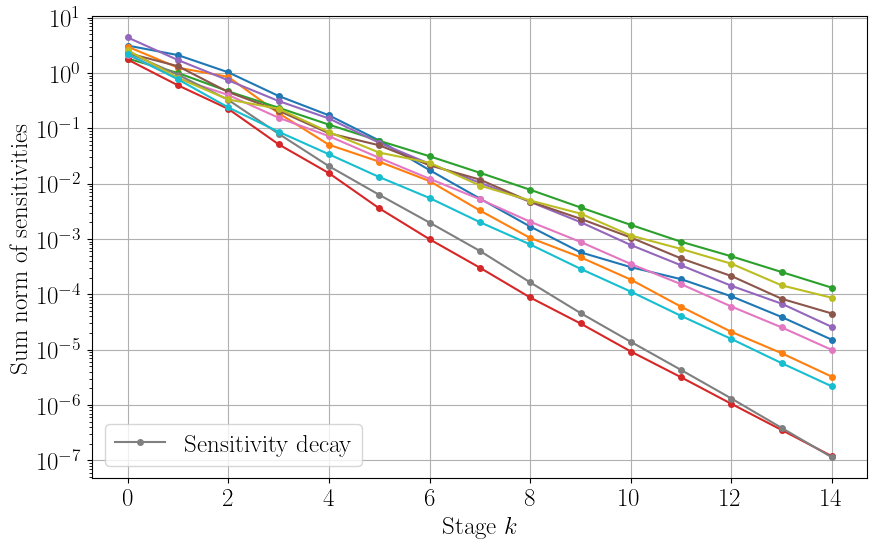

In [2]:
# Settings
N_matrices = 10
n = 4
m = 2
N = 15

all_sensitivities = np.zeros((N_matrices, N))

for matrix_idx in range(N_matrices):
    A, B = generate_random_system_matrices(n, m)
    
    Q = np.diag(np.random.rand(n)) * 10
    R = np.diag(np.random.rand(m)) * 10
    P = solve_discrete_are(A, B, Q, R)#np.diag(np.random.rand(n)) * 10

    sensitivities_formula = sensitivities_closed_form(A, B, Q, R, P, N, n, m)
    
    norm_per_stage = np.zeros(N)
    for k in range(N):
        block = sensitivities_formula[:m, k*n:(k+1)*n]
        norm_per_stage[k] = np.sum(np.abs(block))
    
    all_sensitivities[matrix_idx, :] = norm_per_stage


latexify_plot(fontsize=18)

plt.rcParams.update({
    "lines.linewidth": 2,
    "lines.markersize": 5,
})

plt.figure(figsize=(10, 6))

colors = plt.cm.tab10(np.linspace(0, 1, N_matrices))

for idx in range(N_matrices):
    plt.plot(
        range(0, N),
        all_sensitivities[idx, :],
        '-o',
        color=colors[idx],
        markersize=4,
        linewidth=1.5,
        label='_nolegend_'
    )

custom_line = mlines.Line2D([], [], color='gray', marker='o', linestyle='-',
                            markersize=4, linewidth=1.5, label='Sensitivity decay')
plt.legend(handles=[custom_line], loc='lower left', fontsize=18)

plt.xlabel(r'Stage $k$')
#plt.ylabel(r'\textbf{$||\frac{du_0^*}{d\epsilon_k}||_{\mathrm{sum}}$}')
plt.ylabel('Sum norm of sensitivities')
#plt.title(r'\textbf{1-Norm of Sensitivities of $u_0$ for Random Matrices}')
plt.yscale('log')
plt.grid(True)
#plt.tight_layout()

# Save the plot as pdf and pgf
plot_dir = get_dir("plots")
filename_pdf = plot_dir / "LQ_EDS.pdf"
plt.savefig(filename_pdf, bbox_inches='tight')
filename_pgf = plot_dir / "LQ_EDS.pgf"
plt.savefig(filename_pgf, bbox_inches='tight')

plt.show()